<h1><center>Heesch Group Tesselations</center></h1>

<center><a href = "mailto: joseph.d.romano@gmail.com">joseph.d.romano@gmail.com</a></center>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#mpl.rcParams['figure.dpi'] = 200
#mpl.rcParams['figure.figsize'] = [5,3]
mpl.rcParams['text.usetex'] = True

# Various functions

In [101]:
def makeEdge(type):
    '''
    generate standard edges (horizontal orientation, length=1, leftmost vertex at (0,0))
    
    type: Ea, Eb, Ec, Ca, Cb, Cc
    '''
    
    if type=='Ea':
        
        P = np.zeros((4,2))
        P[0,:] = np.array([0, 0])
        P[1,:] = np.array([0.5, 1./12.])
        P[2,:] = np.array([0.5, 0])
        P[3,:] = np.array([1., 0])
            
    if type=='Eb':
        
        P = np.zeros((4,2))
        P[0,:] = np.array([0, 0])
        P[1,:] = np.array([0.5, 1./12.])
        P[2,:] = np.array([5./6., -1./12.])
        P[3,:] = np.array([1., 0])
        
    if type=='Ec':
        
        P = np.zeros((4,2))
        P[0,:] = np.array([0, 0])
        P[1,:] = np.array([0.25, -1./12.])
        P[2,:] = np.array([0.5, 0])
        P[3,:] = np.array([1., 0])
        
    if type=='Ca':
        
        P = np.zeros((4,2))
        P[0,:] = np.array([0, 0])
        P[1,:] = np.array([1./3., -1./12.])
        P[2,:] = np.array([2./3., 1./12.])
        P[3,:] = np.array([1., 0])
        
    if type=='Cb':
        
        P = np.zeros((6,2))
        P[0,:] = np.array([0, 0])
        P[1,:] = np.array([1./3, 0])
        P[2,:] = np.array([1./3., -1./12.])
        P[3,:] = np.array([2./3., 1./12.])
        P[4,:] = np.array([2./3., 0])
        P[5,:] = np.array([1., 0])
        
    if type=='Cc':
        
        P = np.zeros((8,2))
        P[0,:] = np.array([0, 0])
        P[1,:] = np.array([1./3., 0])
        P[2,:] = np.array([1./3., -1./12.])
        P[3,:] = np.array([0.5, -1./12.])
        P[4,:] = np.array([0.5, 1./12.])
        P[5,:] = np.array([2./3., 1./12.])
        P[6,:] = np.array([2./3., 0])
        P[7,:] = np.array([1., 0])
    
        
    return P

In [102]:
def plotPoints(P):
    '''
    plot points
    '''
    
    N = P.shape[0]
    
    #plt.plot(P[0,0], P[0,1], 'ko')
    #plt.plot(P[N-1,0], P[N-1,1], 'ko')
    
    for ii in range(0,N-1):
        x = np.array([P[ii,0], P[ii+1,0]])
        y = np.array([P[ii,1], P[ii+1,1]])
        
        plt.plot(x, y, color='k', linestyle='-')
        
    return

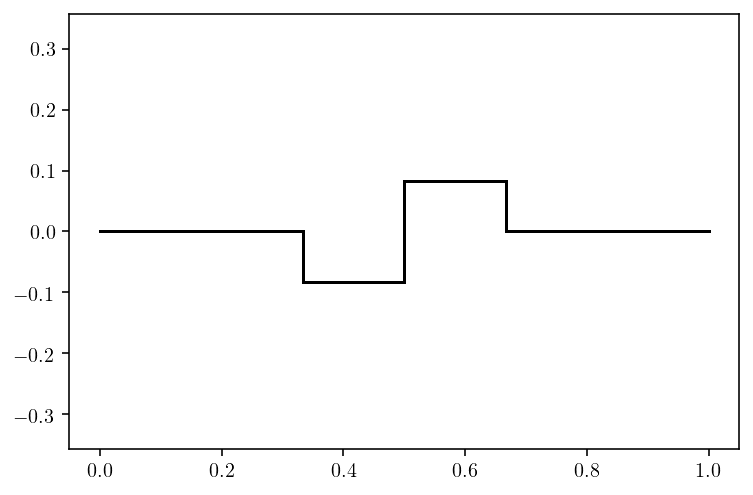

In [103]:
# test plot points

P = makeEdge('Ea')
P = makeEdge('Eb')
P = makeEdge('Ec')
P = makeEdge('Ca')
P = makeEdge('Cb')
P = makeEdge('Cc')

plt.figure()
plt.axis('equal')
plotPoints(P)

In [104]:
def scale(P, scalefactors):
    '''
    scale points by 2-d scalefactors
    '''
    
    scalex = scalefactors[0]
    scaley = scalefactors[1]

    N = P.shape[0]
    Q = np.empty_like(P)
    
    for ii in range(0,N):
        Q[ii,0] = scalex*P[ii,0]
        Q[ii,1] = scaley*P[ii,1]
        
    return Q

In [105]:
def translate(P, shift):
    '''
    translate points by 2-d shift vector
    '''
    
    N = P.shape[0]
    Q = np.empty_like(P)
    
    for ii in range(0,N):
        Q[ii,:] = P[ii,:] + shift
        
    return Q

In [106]:
def Rz(a):
    '''
    calculate passive rotation matrix around z-axis
    '''
    
    R = np.array([[ np.cos(a), np.sin(a)], 
                  [-np.sin(a), np.cos(a)]])
    
    return R

In [107]:
def rotate(P, A, angle):
    '''
    actively rotate points P->Q around A thru angle (in radians)
    '''
    
    # first translate object back to origin
    P = translate(P, -A)
    
    # then do an active rotation (use minus angle)
    R = Rz(-angle)
    
    N = P.shape[0]
    Q = np.empty_like(P)
    
    for ii in range(0,N):
        Q[ii,:] = np.dot(R, P[ii,:])
    
    # translate back
    Q = translate(Q, A)
    
    return Q

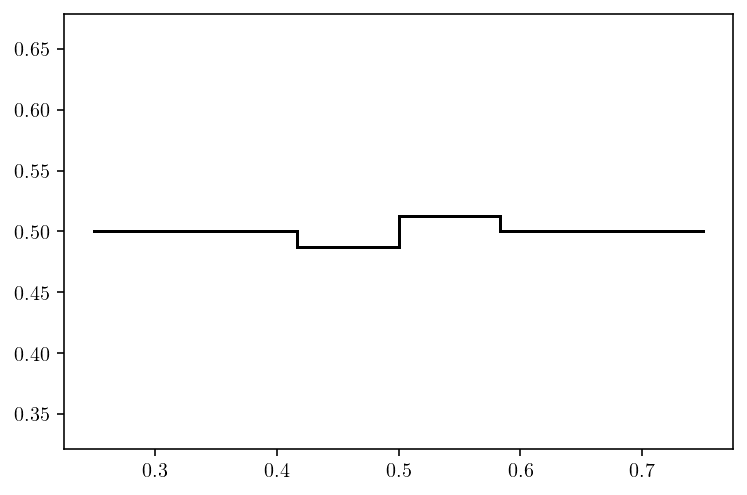

In [108]:
# test scale and translation

P = makeEdge('Cc')

scalefactors = np.array([0.5, 0.15])
shift = np.array([0.25, .5])
QQ = scale(P, scalefactors)
Q = translate(QQ, shift)

plt.figure()
plt.axis('equal')
plotPoints(Q)

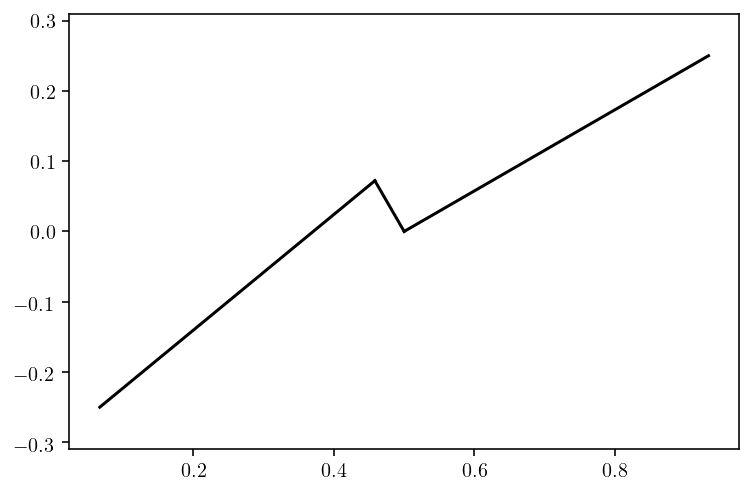

In [109]:
# test rotation

P = makeEdge('Ea')

A = np.array([0.5, 0])
angle = np.deg2rad(30)
Q = rotate(P, A, angle)

plt.figure()
plt.axis('equal')
plotPoints(Q)

In [110]:
def reflect(P, axis):
    '''
    reflect points about an axis = [angle (in radians), y-intercept]
    
    NOTE: if angle=pi/2 then y-intercept is an x-intercept
    '''
    
    # extract reflection axis information
    angle = axis[0]
    b = axis[1]
    
    # check if vertical reflection axis
    if abs(angle)==np.pi/2:
        
        print('vertical reflection axis')
        shift = np.array([b, 0])
        
        # first translate object by -b
        Q = translate(P, -shift)
        
        # now reflect about y-axis
        N = P.shape[0]
        QQ = np.empty_like(P)
        
        for ii in range(0,N):
            QQ[ii,:] = np.array([-Q[ii,0], Q[ii,1]])    

        # translate back
        Q = translate(QQ, shift)
        
    else:
        
        # first translate object by -b
        shift = np.array([0, b])
        Q = translate(P, -shift)
        
        # then rotate by -angle
        A = np.array([0,0])
        Q = rotate(Q, A, -angle)
        
        # now reflect about x-axis
        N = P.shape[0]
        QQ = np.empty_like(P)
        
        for ii in range(0,N):
            QQ[ii,:] = np.array([Q[ii,0], -Q[ii,1]])    
            
        # rotate back
        QQ = rotate(QQ, A, angle)

        # translate back
        Q = translate(QQ, shift)
    
    return Q

In [111]:
def glideReflect(P, axis, scalefac):
    '''
    perform glide reflection of points P 
    
    axis = [angle (rad), y-intercept]
    scalefac = amount to translate by in the direction of the axis
    '''
    
    # first reflect
    Q = reflect(P, axis)
    
    # then translate
    angle = axis[0]
    x = scalefac * np.cos(angle)
    y = scalefac * np.sin(angle)
    shift = np.array([x, y])
    
    Q = translate(Q, shift)
    
    return Q

vertical reflection axis
vertical reflection axis


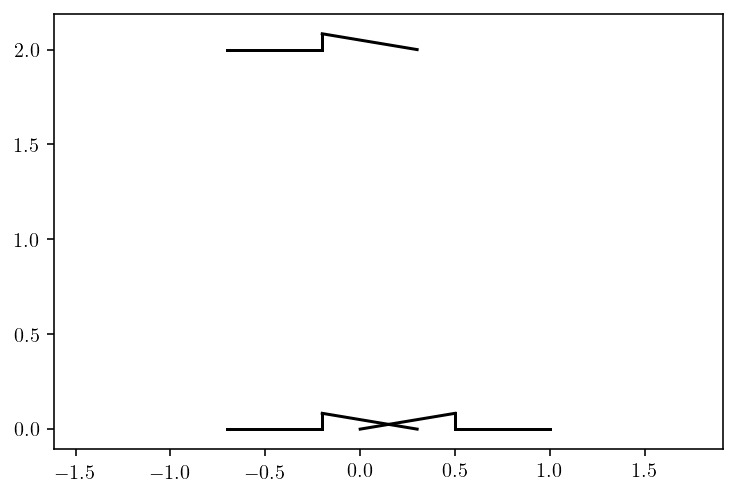

In [112]:
# test reflection and glide reflection

P = makeEdge('Ea')
plt.figure()
plt.axis('equal')
plotPoints(P)

# reflection
b = 0.15 # y or x-intercept
angle = np.deg2rad(90)
axis = np.array([angle, b])
Q = reflect(P, axis)
plotPoints(Q)

# glide reflection
scalefac = 2
R = glideReflect(P, axis, scalefac)
plotPoints(R)

In [135]:
def makeTile(type):
    '''
    make asymmetric heesch tile
    
    type = 'CCC', etc.
    '''
    
    if type=='CCC':
        
        P1 = makeEdge('Ca')
        P2 = makeEdge('Cb')
        P3 = makeEdge('Cc')
        
        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        
        # rotate edge 2 by 60 degrees
        A = np.array([0,0])
        angle = np.deg2rad(60)
        Q2 = rotate(P2, A, angle)
        
        # rotate edge 3 by -60, then translate to top vertex of equilateral triangle
        T3 = rotate(P3, A, -angle)
        x = np.cos(angle)
        y = np.sin(angle)
        shift = np.array([x,y])
        Q3 = translate(T3, shift)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3), axis=0)
        
        
    if type=='CC6C6':
        
        P1 = makeEdge('Ca')
        P2 = makeEdge('Ea')
        
        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        
        # rotate edge 2 by 60 degrees
        A = np.array([0,0])
        angle = np.deg2rad(60)
        Q2 = rotate(P2, A, angle)
        
        # rotate the new edge 2 by 60 about the vertex
        V = np.array([np.cos(angle), np.sin(angle)])
        Q3 = rotate(Q2, V, angle)
        Q3 = np.flipud(Q3)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3), axis=0)
        
    return P

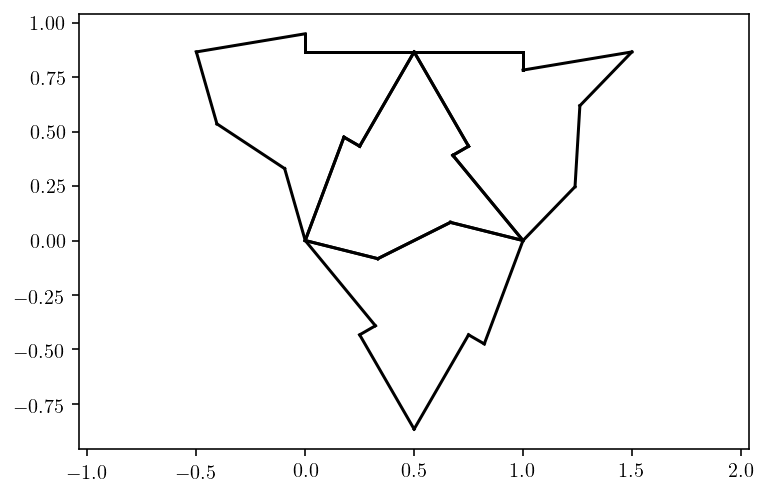

In [136]:
# test make tile

P = makeTile('CC6C6')
plt.figure()
plotPoints(P)
plt.axis('equal')

# rotate tile about centers of bottom edge
A = 0.5*np.array([1,0])
angle = np.deg2rad(180)
Q1 = rotate(P, A, angle)
plotPoints(Q1)

# rotate tile about vertex by 60 degrees
angle = np.deg2rad(60)
V = np.array([np.cos(np.deg2rad(60)), np.sin(np.de)])
Q2 = rotate(P, V, angle)
plotPoints(Q2)

# rotate tile about vertex by -60 degrees
angle = np.deg2rad(-60)
Q3 = rotate(P, V, angle)
plotPoints(Q3)


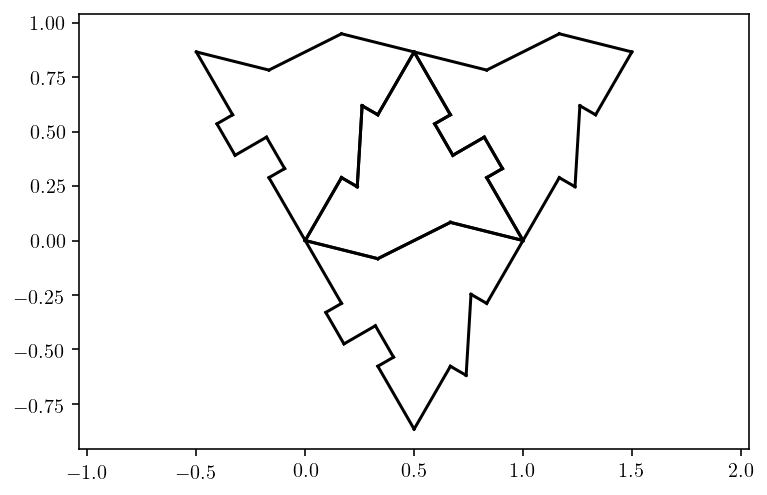

In [137]:
# test make tile

P = makeTile('CCC')
plt.figure()
plotPoints(P)
plt.axis('equal')

# rotate tile about centers of edges
A = 0.5*np.array([1,0])
angle = np.deg2rad(180)
Q1 = rotate(P, A, angle)
plotPoints(Q1)

A = 0.5*np.array([np.cos(np.deg2rad(60)), np.sin(np.deg2rad(60))])
angle = np.deg2rad(180)
Q2 = rotate(P, A, angle)
plotPoints(Q2)

A = A + 0.5*np.array([1,0])
angle = np.deg2rad(180)
Q3 = rotate(P, A, angle)
plotPoints(Q3)

# translate tile
#shift = np.array([1,0])
#R = translate(Q, shift)
#plotPoints(R)

# Interactive code



input axis (x,y,z; w to quit): z
input angle (degrees): 0


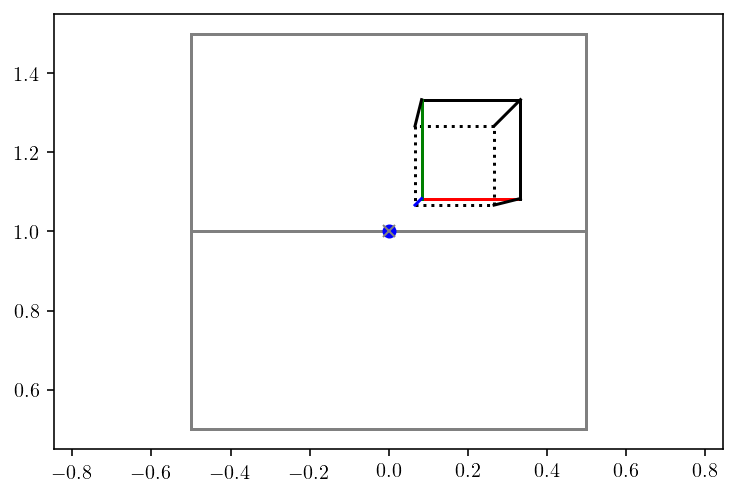



input axis (x,y,z; w to quit): z
input angle (degrees): 30


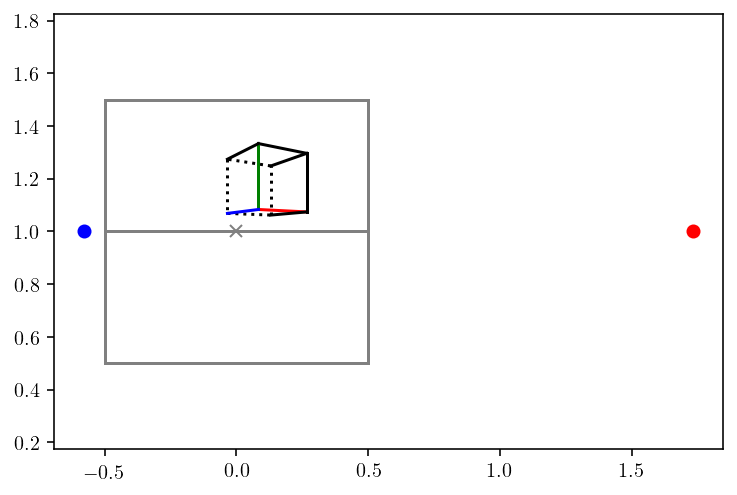



input axis (x,y,z; w to quit): x
input angle (degrees): 30


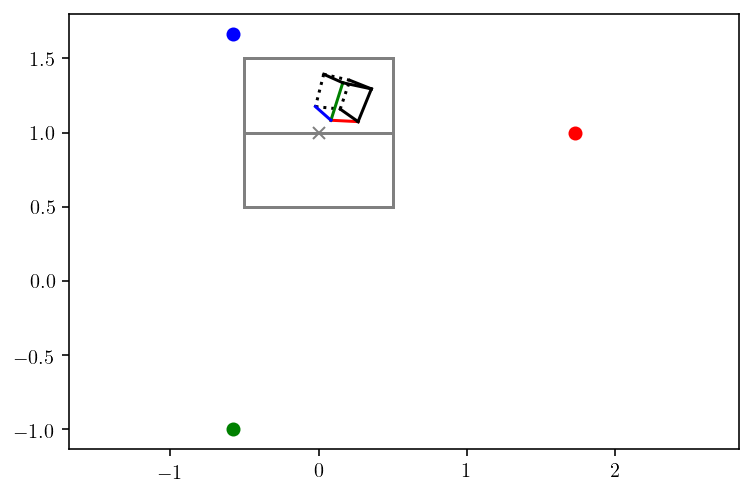



input axis (x,y,z; w to quit): y
input angle (degrees): -15


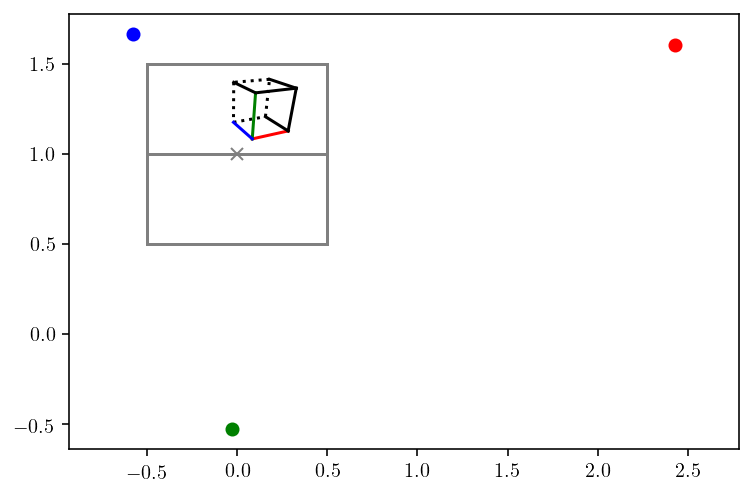



input axis (x,y,z; w to quit): z
input angle (degrees): 20


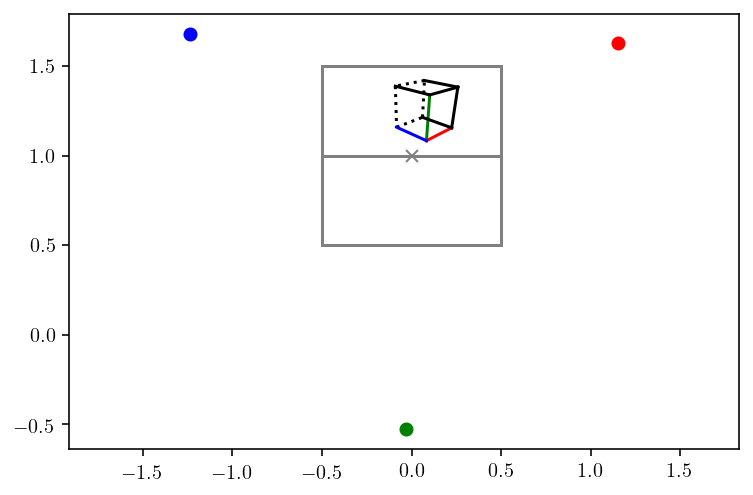

In [ ]:
# interactive 3-point perspective of a box

# number of vertices for box
N = 8

# distance of eye point to picture plane
d = 1

# height of horizon line above ground plane
h = 1

# approximately 30 degree angular field
ulim = 0.5*d
vlim = 0.5*d

# shift vector for eventual translation of a point in physical space beyond picture plane
#shift = np.array([0, d+5, h]) # vertex at CP on HL
shift = np.array([-0.5+1, d+5, h-0.5+1]) # right and above HL
   
# generate vertices for standard cube 
V0 = standardCube()
    
# scale cube ('box' = rectangular parallelpiped)
#scalefactors = np.array([2, 1, 1])
scalefactors = np.array([1.5, 1.5, 1.5])
V1 = scale(V0, scalefactors)
    
# initial rotation (identity)
prevRot = np.eye(3)
    
# loop for successive rotations
counter = 1
while 1!=0:
    
    # input axis, angle
    print('\n')
    axis  = input('input axis (x,y,z; w to quit): ')
    if axis=='w':
        break
        
    angle = input('input angle (degrees): ')
    
    # convert string input to float and degrees to radians
    angle = float(angle)
    angle = np.deg2rad(angle)
    
    # perform rotation
    V2, a_vec, b_vec, c_vec, newRot = rotate(V1, axis, angle, prevRot)

    # perform translation to a point in physical space beyond picture plane
    V3 = translate(V2, shift)
    
    # perform perspective transformation from physical space to picture plane
    u = np.zeros(N)
    v = np.zeros(N)
    
    for ii in range(0,N):
        u[ii], v[ii] = xyz2uv(V3[ii,:], d, h)
    
    # calculate vanishing points
    VPx, VPy, VPz = vanishingPoints(d, h, a_vec, b_vec, c_vec)
    
    # plot
    plt.figure()
    
    # horizon line
    plt.plot(np.array([-ulim, ulim]), np.array([h, h]), color='grey')
    
    # picture plane
    plt.plot(np.array([-ulim, ulim]), np.array([h+vlim, h+vlim]), color='grey')
    plt.plot(np.array([-ulim, ulim]), np.array([h-vlim, h-vlim]), color='grey')
    plt.plot(np.array([-ulim, -ulim]), np.array([h-vlim, h+vlim]), color='grey')
    plt.plot(np.array([ulim, ulim]), np.array([h-vlim, h+vlim]), color='grey')
    
    # vanishing points
    plt.plot(VPx[0], VPx[1], 'ro')
    plt.plot(VPy[0], VPy[1], 'bo')
    plt.plot(VPz[0], VPz[1], 'go')
    
    # center point
    plt.plot(0, h, color='grey', marker='x')
    
    # back
    plt.plot(np.array([u[4], u[5]]), np.array([v[4], v[5]]), color='k', linestyle=':')
    plt.plot(np.array([u[5], u[6]]), np.array([v[5], v[6]]), color='k', linestyle=':')
    plt.plot(np.array([u[6], u[7]]), np.array([v[6], v[7]]), color='k', linestyle=':')
    plt.plot(np.array([u[7], u[4]]), np.array([v[7], v[4]]), color='k', linestyle=':')
    
    # front
    plt.plot(np.array([u[0], u[1]]), np.array([v[0], v[1]]), color='r', linestyle='-')
    plt.plot(np.array([u[1], u[2]]), np.array([v[1], v[2]]), color='k', linestyle='-')
    plt.plot(np.array([u[2], u[3]]), np.array([v[2], v[3]]), color='k', linestyle='-')
    plt.plot(np.array([u[3], u[0]]), np.array([v[3], v[0]]), color='g', linestyle='-')
    
    # right side
    plt.plot(np.array([u[2], u[6]]), np.array([v[2], v[6]]), color='k', linestyle='-')
    plt.plot(np.array([u[1], u[5]]), np.array([v[1], v[5]]), color='k', linestyle='-')
    
    # left side
    plt.plot(np.array([u[0], u[4]]), np.array([v[0], v[4]]), color='b', linestyle='-')
    plt.plot(np.array([u[3], u[7]]), np.array([v[3], v[7]]), color='k', linestyle='-')
    
    # equal aspect ratio
    plt.axis('equal')
    
    # savefig
    figtitle = 'threepoint_' + str(counter)
    plt.savefig(figtitle, bbox_inches='tight', dpi=400)
    
    # display figure
    plt.show()
    
    # prepare for next rotation
    prevRot = newRot
    counter = counter + 1
    
